<a href="https://colab.research.google.com/github/AnastasiyaKS/IDA-labs-RU/blob/master/Lab2__Data_Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


<h1 align=center><font size = 5>DATA VISUALIZATION I</font></h1>
<br>
<h2 align=center>Чому вмирають люди в Об'єднаних Штатах Америки? Візуалізація даних про смертність</h2>

1. [ Як вмирають люди в Об'єднаних Штатах? Візуалізація даних про смертність в USA](#top)
1. [бібліотека matplotlib ](#mpl)
1. [Отримання даних](#getdata)
1. [Розуміння даних](#understand)
1. [Кількість смертей : на рік](#year)
1. [Кількість смертей : Чоловіки та жінки](#gender)
1. [Кількість смертей : За віком](#age)
1. [Кількість смертей : За віком та статтю](#ageXgender)
1. [Топ 10 причин смерті в 2015](#causeX2015)
1. [оп 10  причин смерті на рік](#causeXyear)
1. [Причини смерті за статтю](#causeXgender)
1. [Причини смерті за віком](#causeXage)
1. [Причини смерті за віком та статтю](#causeXgenderXage)

# Як вмирають люди в Об'єднаних Штатах? Візуалізація даних про смертність

**Death** is a _morbid_ topic, but it is a topic that is important for the government, for healthcare, economics and of course, medical sciences. Understanding how people are dying can lead to changes in research funding for certain diseases, or increased preventative measures when certain kinds of people are at risk.

In United States, the **Centers of Disease Control and Prevention (CDC)** have been collecting [mortality data](https://wonder.cdc.gov/ucd-icd10.html) from 1999-2015. The data is rich in demographic info, including age of death, underlying cause of death, gender, and even race and geographic city/county.

With data, there are many **questions we can ask about death**:
- What are the top causes of death in the United States? 
- Are men more likely to die than women? Does it depend on the cause of death? Does it depend on age?
- What causes of death are becoming more or less prevalent over time?

//

** Смерть ** - це  досить важка тема, але дані про смертність важливі для уряду, для охорони здоров'я, економіки та, звичайно ж, медичних наук. Розуміння причин смертності може призвести до змін фінансування досліджень за певними захворюваннями або збільшення профілактичних заходів, якщо виявлено, що певні групи людей знаходяться у зоні ризику.

У США ** Центри контролю і профілактики захворювань (CDC) ** збирають [дані про смертність] (https://wonder.cdc.gov/ucd-icd10.html) з 1999 по 2015 рр. Дані включають демографічну інформацію, включаючи вік смерті, основну причину смерті, стать та навіть расу та географічне положення: місто / округ.

Питання, які виникають в першу чергу:
- Які основні причини смерті в Сполучених Штатах?
- Чи чоловіки частіше вмирають, ніж жінки? Чи залежить це від причини смерті? Чи залежить це від віку?
- Які причини смерті стають більш або менш поширені з плином часу?

#### Візуалізація даних

У цьому ноутбуці вам буде запропоновано ** matplotlib **, один з найпопулярніших пакетів візуалізації даних у Python.

Є багато різних способів використання matplotlib, але цей ноутбук просто продемонструє основи. Якщо ви хочете продовжити та дізнатися більше про matplotlib, перегляньте документацію [тут] (http://matplotlib.org/).

<a id="mpl"></a>
 Імпортуйте  бібліотеку `matplotlib` 

Для початку впевнимося, що імпортовано бібліотеки, необхідні для візуалізації графіків

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
 
#Цей код необхідний, щоб графіки могли бути візуалізовані в ноутбуках
%matplotlib inline 

#Дозволити кодування спеціальних символів (українською мовою)
import sys
reload(sys) 
sys.setdefaultencoding('GBK') #warning may display but is OK

<a id="getdata"></a>
## Отримання даних

Зантажимо файл deaths.csv

In [0]:
!wget --output-document /deaths-ukr.csv https://ibm.box.com/shared/static/b2p1qr55h9ihn37szn68xi2z2a4q23om.csv

Тепер, коли він знаходиться у вашому обліковому записі, ви можете прочитати його з файлового шляху deaths-ukr.csv:

In [0]:
# Спробуй себе - введи код


df = pd.read_csv("/deaths-ukr.csv")


Чудово! Тепер дані доступні в змінній **`df`**

<a id="understand"></a>
##Розуміння даних

#### <font color =red> Перші 10 рядків таблиці

In [0]:
df.head(10)

,Cause,CauseUKR,Code-ICD-10-113,Age,Gender,Year,Deaths,Population,Crude Rate
0,Salmonella infections,Зараження сальмонелою,GR113-001,0,F,2005,0,1956682,Unreliable
1,Salmonella infections,Зараження сальмонелою,GR113-001,0,F,2010,1,1929877,Unreliable
2,Salmonella infections,Зараження сальмонелою,GR113-001,0,F,2015,3,1942904,Unreliable
3,Salmonella infections,Зараження сальмонелою,GR113-001,1,F,2005,0,1950494,Unreliable
4,Salmonella infections,Зараження сальмонелою,GR113-001,1,F,2010,0,1947217,Unreliable
5,Salmonella infections,Зараження сальмонелою,GR113-001,1,F,2015,0,1939269,Unreliable
6,Salmonella infections,Зараження сальмонелою,GR113-001,2,F,2005,0,1932337,Unreliable
7,Salmonella infections,Зараження сальмонелою,GR113-001,2,F,2010,0,2004731,Unreliable
8,Salmonella infections,Зараження сальмонелою,GR113-001,2,F,2015,0,1939979,Unreliable
9,Salmonella infections,Зараження сальмонелою,GR113-001,3,F,2005,0,1930395,Unreliable


#### <font color = red> Останні 5 рядків таблиці

In [0]:
df.tail(5)

,Cause,CauseUKR,Code-ICD-10-113,Age,Gender,Year,Deaths,Population,Crude Rate
30901,Enterocolitis due to Clostridium difficile,Ентероколит через Clostridium difficile,GR113-136,99,M,2010,6,Not Applicable,Not Applicable
30902,Enterocolitis due to Clostridium difficile,Ентероколит через Clostridium difficile,GR113-136,99,M,2015,7,Not Applicable,Not Applicable
30903,Enterocolitis due to Clostridium difficile,Ентероколит через Clostridium difficile,GR113-136,100,M,2005,8,Not Applicable,Not Applicable
30904,Enterocolitis due to Clostridium difficile,Ентероколит через Clostridium difficile,GR113-136,100,M,2010,4,Not Applicable,Not Applicable
30905,Enterocolitis due to Clostridium difficile,Ентероколит через Clostridium difficile,GR113-136,100,M,2015,14,Not Applicable,Not Applicable


#### <font color = red> Який діапазон значень для стовпця "Вік"?

Підказка: отримати стовпець "Age", потім використайте describe()

In [0]:
df['Age'].describe()

count    30906.000000
mean        50.000000
std         29.155231
min          0.000000
25%         25.000000
50%         50.000000
75%         75.000000
max        100.000000
Name: Age, dtype: float64

In [0]:
df.Age.describe()

count    30906.000000
mean        50.000000
std         29.155231
min          0.000000
25%         25.000000
50%         50.000000
75%         75.000000
max        100.000000
Name: Age, dtype: float64

#### <font color = red> Які роки включені в цей набір даних? Спробуйте використовувати  функцію unique()

In [0]:
df.Year.unique()

array([2005, 2010, 2015])

#### <font color = red> Підсумуйте статистику за смертю

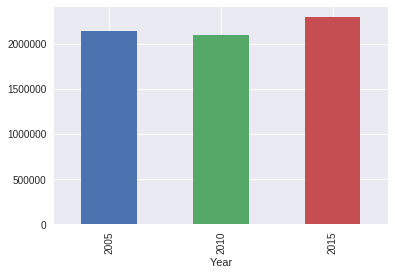

In [0]:
df.groupby(['Year']).Deaths.sum().plot(kind = "bar")

#### Які причини смертей в цьому наборі даних?

<font color=blue>!! Кожного разу, коли ви бачите 'Cause', ви можете замінити його 'CauseUKR', щоб показати його українською мовою

In [0]:
df.Cause.unique()

array(['Salmonella infections', 'Shigellosis and amebiasis',
       'Tuberculosis', 'Whooping cough', 'Scarlet fever and erysipelas',
       'Meningococcal infection', 'Septicemia', 'Syphilis',
       'Acute poliomyelitis', 'Arthropod-borne viral encephalitis',
       'Measles', 'Viral hepatitis', 'Accidents (unintentional injuries)',
       'Malaria', 'Malignant neoplasms',
       'In situ neoplasms, benign neoplasms and neoplasms of uncertain or unknown behavior',
       'Anemias', 'Diabetes mellitus', 'Nutritional deficiencies',
       'Meningitis', "Parkinson's disease", "Alzheimer's disease",
       'Diseases of heart',
       'Essential hypertension and hypertensive renal disease',
       'Cerebrovascular diseases', 'Atherosclerosis',
       'Aortic aneurysm and dissection', 'Influenza and pneumonia',
       'Acute bronchitis and bronchiolitis',
       'Chronic lower respiratory diseases',
       'Pneumoconioses and chemical effects',
       'Pneumonitis due to solids and liquids

In [0]:
#causes = df.sort_values(['Cause']) 
causes = df.sort_values(['CauseUKR'])
causes.index=range(0, len(causes)) #re-index the row numbers
causes


,Cause,CauseUKR,Code-ICD-10-113,Age,Gender,Year,Deaths,Population,Crude Rate
0,Infections of kidney,_нфекц__ нирок,GR113-102,0,M,2015,1,2035134,Unreliable
1,Infections of kidney,_нфекц__ нирок,GR113-102,68,F,2005,6,1040489,Unreliable
2,Infections of kidney,_нфекц__ нирок,GR113-102,67,F,2015,7,1741227,Unreliable
3,Infections of kidney,_нфекц__ нирок,GR113-102,67,F,2010,5,1400459,Unreliable
4,Infections of kidney,_нфекц__ нирок,GR113-102,67,F,2005,2,1102944,Unreliable
5,Infections of kidney,_нфекц__ нирок,GR113-102,66,F,2015,7,1760795,Unreliable
6,Infections of kidney,_нфекц__ нирок,GR113-102,66,F,2010,5,1390865,Unreliable
7,Infections of kidney,_нфекц__ нирок,GR113-102,66,F,2005,6,1121292,Unreliable
8,Infections of kidney,_нфекц__ нирок,GR113-102,65,F,2015,13,1812107,Unreliable
9,Infections of kidney,_нфекц__ нирок,GR113-102,65,F,2010,3,1407451,Unreliable


<a id="year"></a>
## Кількість смертей : на рік

#### Подивимось на дані:

In [0]:
df.head(3)

,Cause,CauseUKR,Code-ICD-10-113,Age,Gender,Year,Deaths,Population,Crude Rate
0,Salmonella infections,Зараження сальмонелою,GR113-001,0,F,2005,0,1956682,Unreliable
1,Salmonella infections,Зараження сальмонелою,GR113-001,0,F,2010,1,1929877,Unreliable
2,Salmonella infections,Зараження сальмонелою,GR113-001,0,F,2015,3,1942904,Unreliable


#### Скільки смертей в цілому в 2005, 2010 та 2015 роках?

По-перше, необхідно ** згрупувати дані за рік **, потім, вказавши стовпець ** Deaths **, ми можемо обчислити ** суми смертей на рік **:

In [0]:
by_year = df.groupby("Year").Deaths.sum()
by_year

Year
2005    2143662
2010    2102234
2015    2294942
Name: Deaths, dtype: int64

Після того, як ви набрали дані, будувати графіки легко. З ** `.plot()` ** вам просто потрібно вибрати вид графіка:

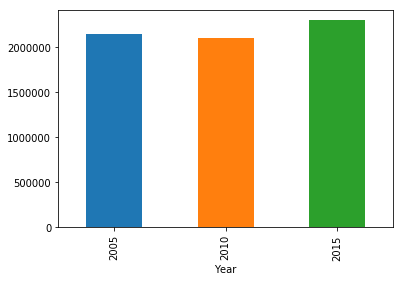

In [0]:
by_year.plot(kind = "bar")

#### Ми можемо переписати код, щоб було легше розуміти послідовність дій:

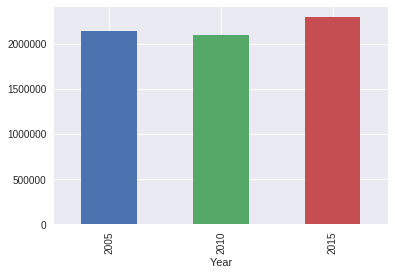

In [0]:
# Змінюємо синтаксис на більш читаємий. знак  "\" вказує, що необхідно перейти на наступний рядок коду перед тим як виконувати його
df.groupby("Year")\
.Deaths\
.sum()\
.plot(kind = "bar")

## Розділимо дані на окремі роки

Може бути не дуже зрозуміло, якщо ми будемо весь час працювати з даними одразу за 2005, 2010 та 2015 роки.
  
Давайте подивимось лише на дані про ** смерті у 2015 році **.

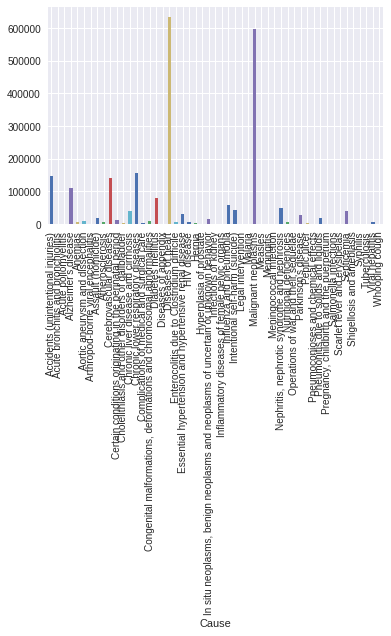

In [0]:
df[df.Year == 2015].groupby("Cause").Deaths\
.sum()\
.plot(kind = "bar")

<a id="gender"></a>
## Кількість смертей : чоловіки та жінки

У 2015 році, який гендер має вищий рівень смертності?

In [0]:
df2015 = df[df.Year == 2015]

df2015\
.groupby("Gender")\
.Deaths\
.sum()

Gender
F    1103789
M    1191153
Name: Deaths, dtype: int64

### <font color="red"> Вправа: чи можете ви створити простий гістограму, щоб порівняти загальну кількість смертей для кожного гендеру? </font>

Пам'ятайте, використовуючи дані ** 2015 (`df2015`) **, спочатку ** group by `Gender`**, потім ** виберіть колонку `Deaths` **, обчисліть **` sum` **, потім ** plot as a `bar` chart**.

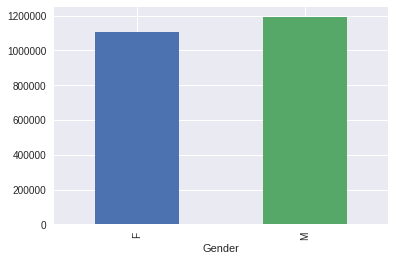

In [0]:
df2015\
.groupby("Gender")\
.Deaths\
.sum()\
.plot(kind = "bar")

Додамо **колір** до графіка: <font color = red> Червоний </font> для ** Female ** і <font color = blue> Синій </font> для ** Male **.

Синтаксис:
> `.plot(kind = "bar", ` **`color = ["red", "blue"]`**`)`

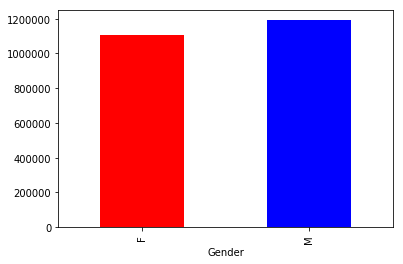

In [0]:
df2015\
.groupby("Gender")\
.Deaths\
.sum()\
.plot(kind = "bar", color = ["red", "blue"])

<a id="age"></a>
## Deaths: by Age // Кількість смертей : За віком

At what age did people die in 2015? // У якому віці люди вмирають у 2015 році?

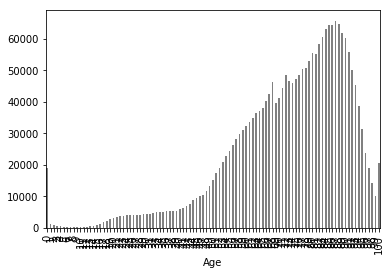

In [0]:
df2015\
.groupby("Age")\
.Deaths\
.sum()\
.plot(kind = "bar", color = "grey")

The graph above is difficult to read -- it's **too small**!  // Графік вище важко прочитати - це занадто мале!

We can increase the figure size using: // Ми можемо збільшити розмір фігури за допомогою:
> `.plot(kind = "bar",`** figsize = [18,6]**`)`

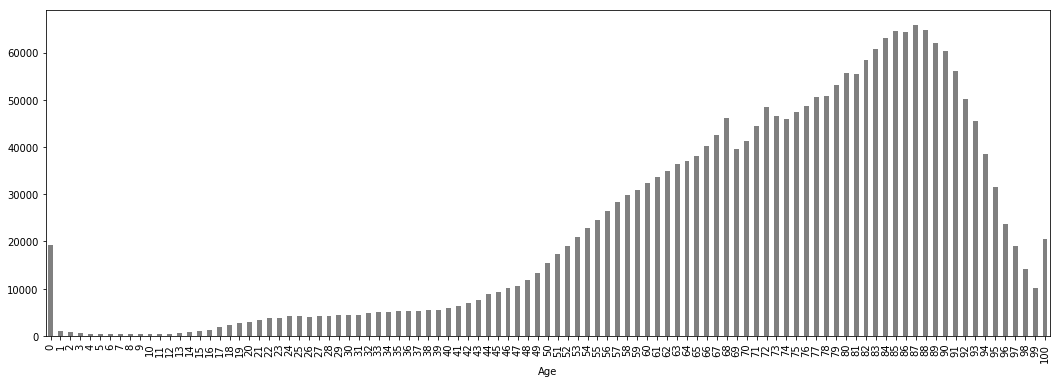

In [0]:
df2015\
.groupby("Age")\
.Deaths\
.sum()\
.plot(kind = "bar", color = "grey", figsize = [18,6])

<font color="green"> Discuss: What do you notice from the graph above? // Обговорити: що ви помітили з наведеного вище графіка?</font>

<a id="ageXgender"></a>
## Deaths: by Age & Gender // Кількість смертей : За віком та статтю

#### Is age of death affected by gender? // Чи залежить вік смерті від статі?

To groupby the data using two variables, simply use a list: // Для групування за даними, використовуючи **дві** змінні, просто використовуйте a list:
> `.groupby(`**`["Age", "Gender"]`**`)`

In [0]:
df2015\
.groupby(["Age", "Gender"])\
.Deaths\
.sum()

Age  Gender
0    F          8634
     M         10512
1    F           470
     M           645
2    F           335
     M           448
3    F           239
     M           372
4    F           191
     M           280
5    F           185
     M           252
6    F           197
     M           215
7    F           168
     M           191
8    F           149
     M           206
9    F           143
     M           215
10   F           117
     M           209
11   F           147
     M           207
12   F           166
     M           240
13   F           230
     M           311
14   F           282
     M           454
               ...  
86   F         34950
     M         29452
87   F         36181
     M         29581
88   F         36741
     M         27971
89   F         36253
     M         25708
90   F         36327
     M         23963
91   F         34454
     M         21538
92   F         31655
     M         18526
93   F         29469
     M         16069
9

#### Let's create two subplots -- one for female and male deaths by age. // Створімо два підрозділи - одне для жінок та чоловіків за віком.

We can create subplots using: //Ми можемо створювати subplots за допомогою:  
> ...  
> **`.unstack(1)`**`\`  
> `.plot(kind = "bar", ` **` subplots = True`**`)`

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f67786b3950>,
      dtype=object)

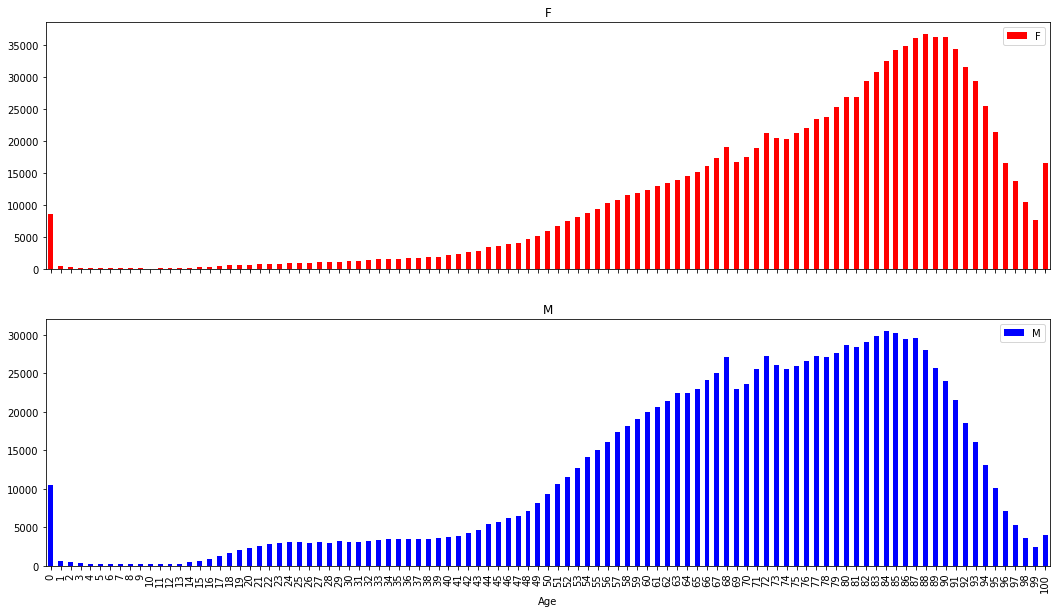

In [0]:
df2015\
.groupby(["Age", "Gender"])\
.Deaths\
.sum()\
.unstack(1)\
.plot(kind = "bar", color = ["red","blue"], figsize = [18,10], subplots = True)

In [0]:
unstack?

<font color="green"> Discuss: What do you notice from the graph above? // Що ви помітили з наведеного вище графіка?</font>

We can also **stack** the Male and Female together to form a total bar. // Ми можемо також ** створити ** Чоловік і Жінки разом, щоб сформувати загальний бар.

To create stacked bar charts, we can use: // Для створення стекових стрічкових графіків ми можемо використовувати:  
>`.plot(kind = "bar", ` **`stacked = True`**`)`

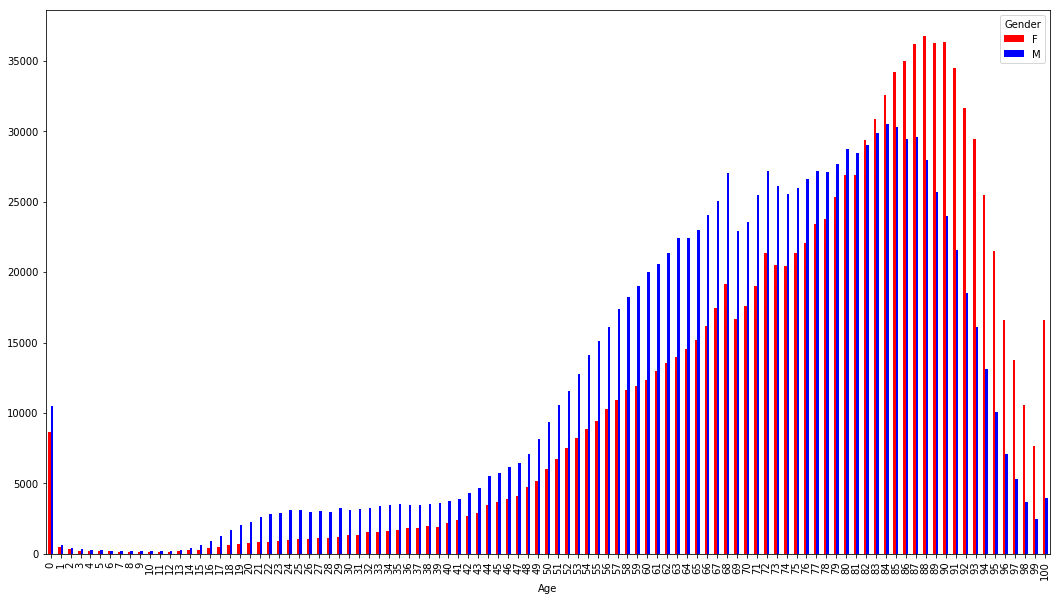

In [0]:
df2015\
.groupby(["Age", "Gender"])\
.Deaths\
.sum()\
.unstack(1)\
.plot(kind = "bar", color = ["red","blue"], figsize = [18,10])

But this isn't very helpful because it is not easy to compare M to F in a stacked bar chart. // Але це не дуже корисно, оскільки порівняти самців і жінок зі складною стрічкою непросто. 

#### Because `Age` is a continuous variable, it might help to compare lines on a **line graph**.  // Оскільки Вік є безперервною змінною, це може допомогти порівняти лінії на лінійному графіку.


We can create line graphs using: // Ми можемо створювати графіки з використанням:  
> `.plot(kind = "`**`line`**`")`

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f1c52299250>,
      dtype=object)

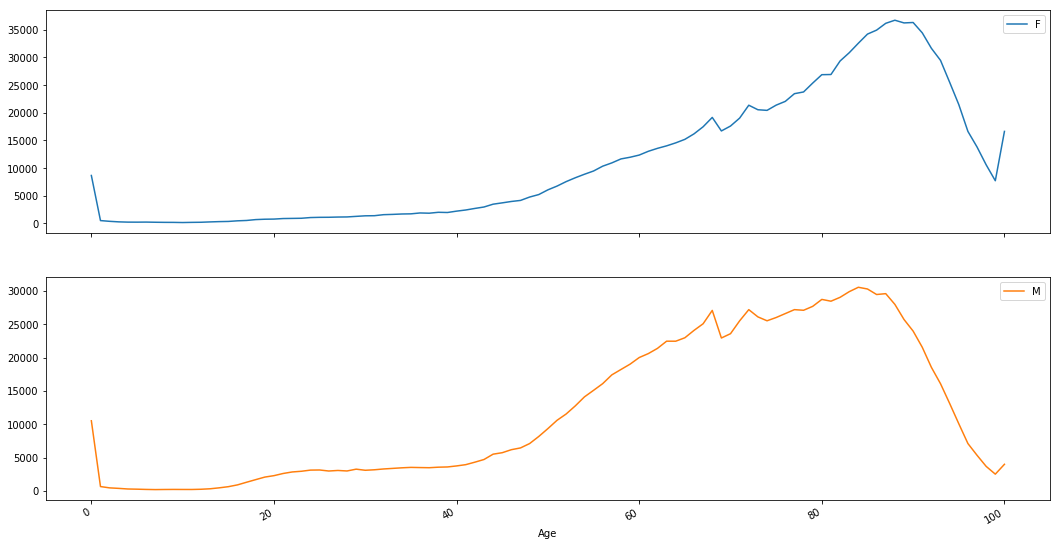

In [0]:
df2015\
.groupby(["Age", "Gender"])\
.Deaths\
.sum()\
.unstack(1)\
.plot(kind = "line", figsize = [18,10], subplots = True)

Now with just lines, this makes it easier to compare the gender difference over age in **one line graph**.  //  Тепер за допомогою простого рядка це полегшує порівняння гендерної різниці за віком у ** одному графічному рядку **.  

To plot multiple groups in the same graph, make sure that you have **unstacked the data** and **kept subplots as False (default)** :     //   Щоб закріпити декілька груп на тому ж графі, переконайтеся, що у вас є ** невстановлені дані ** і ** зберігаються підменю як False (за умовчанням) **:
>`...`  
>**`.unstack(1)`**`\`  
>`.plot(kind = "line")   #Default: subplots = False`

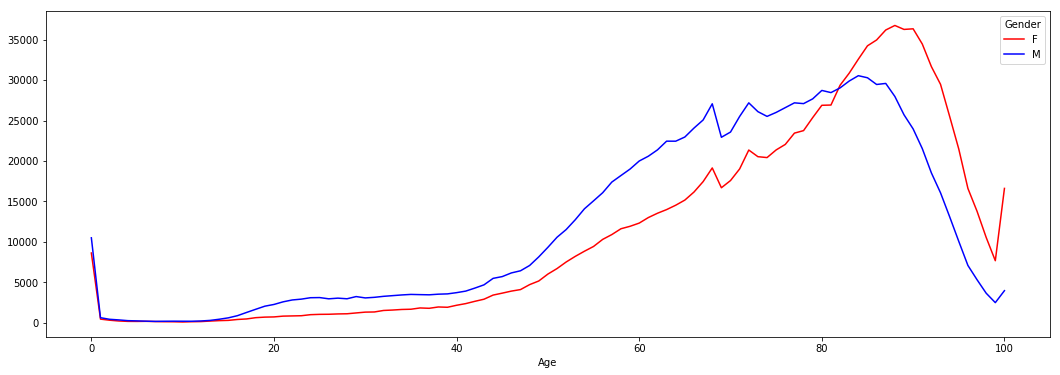

In [0]:
df2015\
.groupby(["Age", "Gender"])\
.Deaths\
.sum()\
.unstack(1)\
.plot(kind = "line", color = ["red","blue"], figsize = [18,6])

Let's add a main title and a y-axis label: // Додамо основний заголовок та мітку Y-осі:

> `.plot(kind = "line",` **`title = "Deaths in 2015 by Age and Gender"`**`)`


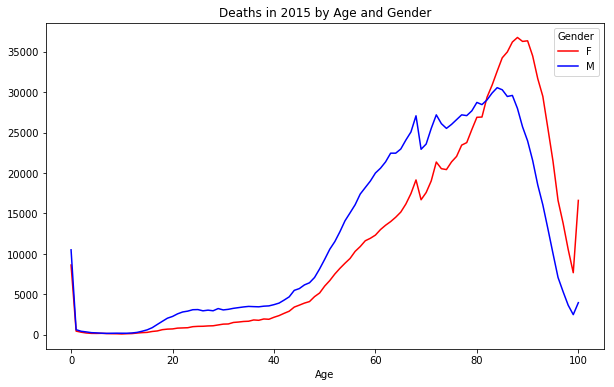

In [0]:
df2015\
.groupby(["Age", "Gender"])\
.Deaths\
.sum()\
.unstack(1)\
.plot(kind = "line", color = ["red","blue"], figsize = [10,6], title = "Deaths in 2015 by Age and Gender")

<a id="causeX2015"></a>
## Deaths: Top Causes of Death in 2015 // Топ 10 найпопулярніших причин смерті в 2015

Let's look at the top causes of death in 2015:

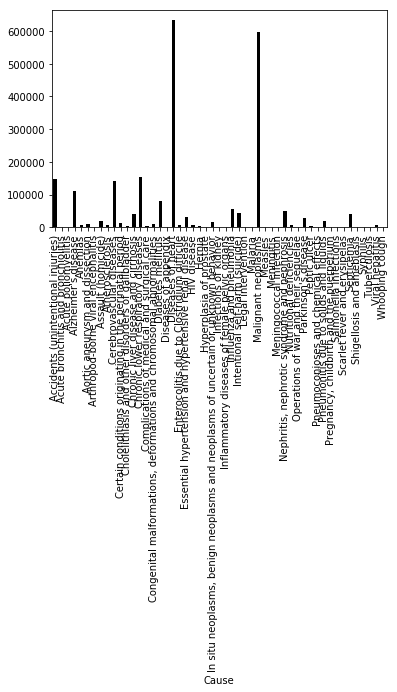

In [0]:
df2015\
.groupby(["Cause"])\
.Deaths\
.sum()\
.plot(kind = "bar", color = "black")

This is very difficult to read. We need to **sort the data** and **rotate the graph (horizontal bar chart)**. // Це дуже важко прочитати. Нам потрібно сортувати дані та повернути графік (горизонтальна стрічкова діаграма).

1. We can **sort** the data using: // Ми можемо ** сортувати ** дані, використовуючи:
> **`.sort('Deaths', ascending = True)`**

2. We can create a **horizontal bar chart** using: // Ми можемо створити ** горизонтальну стрічкову діаграму **, використовуючи:
> **`.plot(kind = "barh")`**

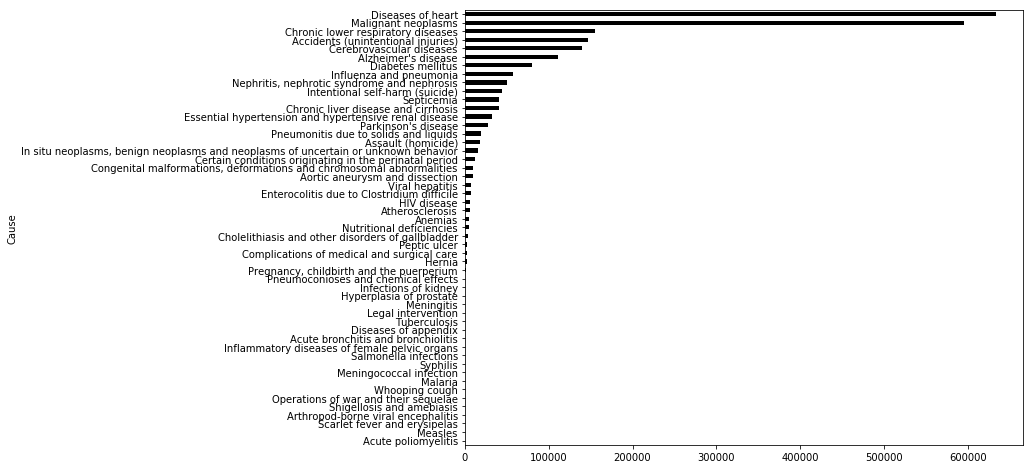

In [0]:
df2015\
.groupby(["Cause"])\
.agg({'Deaths' : sum})\
.sort_values('Deaths', ascending = True)\
.plot(kind = "barh", legend = False, color = "black", figsize = [10,8])

#### Let's look at the Top 10 most common causes of death.  //  Давайте подивимося на 10 найпоширеніших причин смерті.

To get the Top 10, before we plot can use: // Щоб отримати Top 10, перед тим, як ми можемо використовувати сюжет:
>`.sort('Deaths', ascending = True)`**`[-10:]`**`\`

Remember: `[-10,:]` means to get the items from the 10th last item, to the last item. // Пам'ятайте: `[-10 ,:]` означає, що потрібно отримати елементи з 10-го останнього елемента, до останнього пункту.

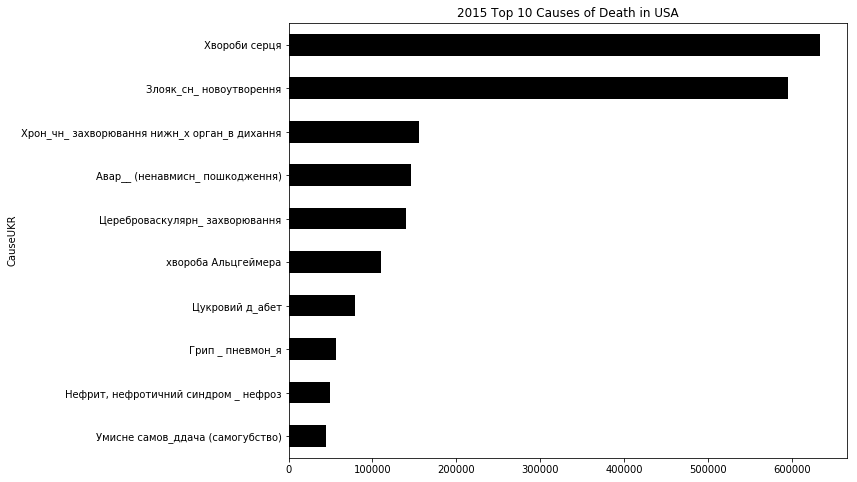

In [0]:
df2015\
.groupby(["CauseUKR"])\
.agg({'Deaths' : sum})\
.sort_values('Deaths')[-10:]\
.plot(kind = "barh", legend = False, color = "black", figsize = [10,8], title = "2015 Top 10 Causes of Death in USA")

<a id="causeXyear"></a>
## Deaths: Top Causes of Death by Year // найпопулярніших причин смерті на рік

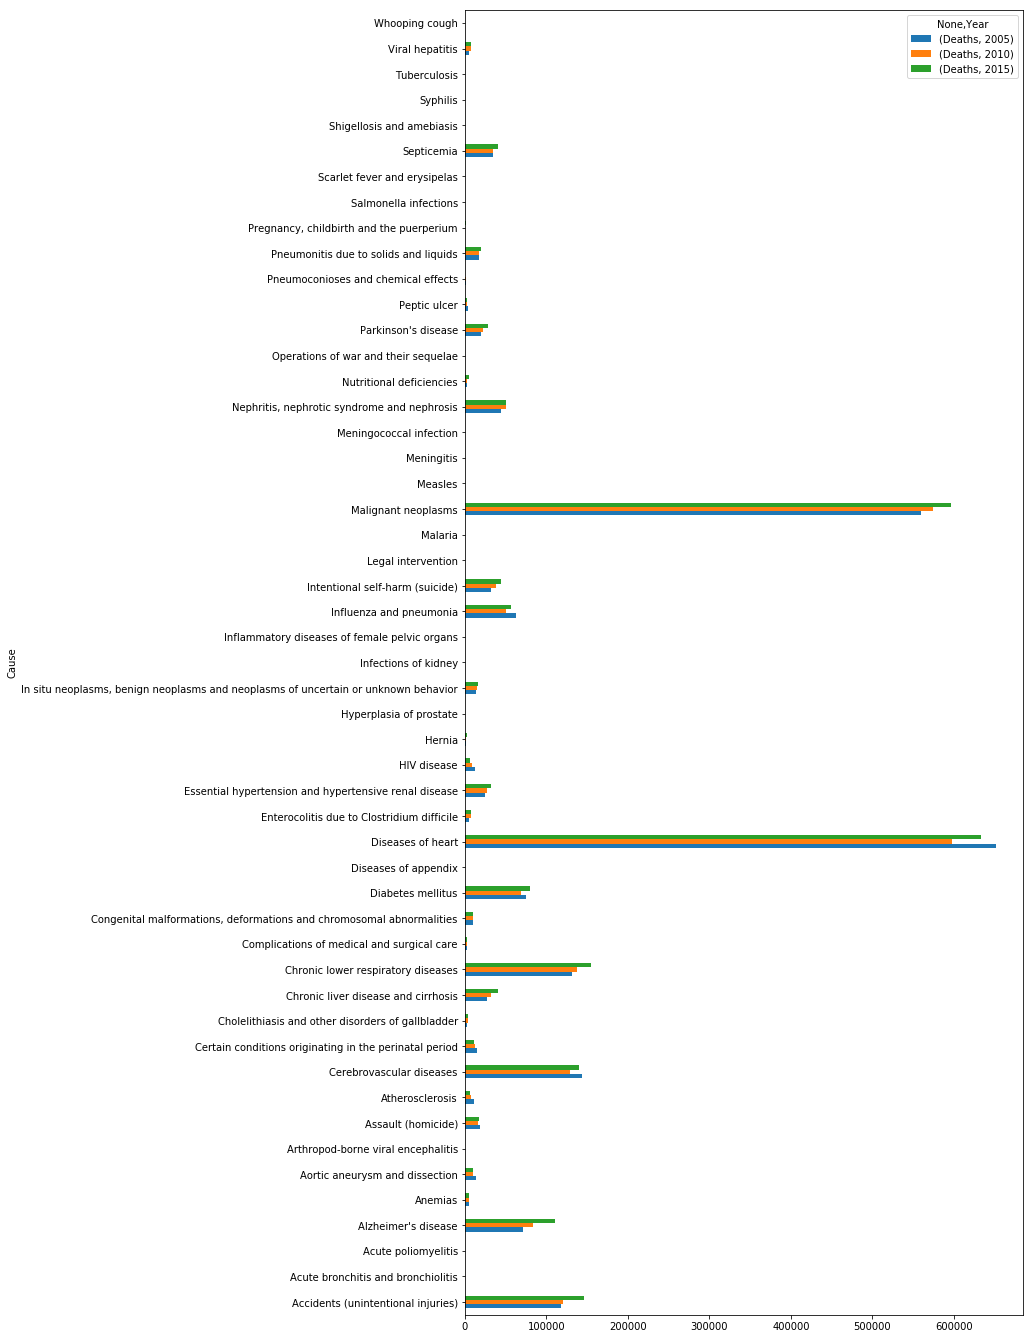

In [0]:
df\
.groupby(["Cause","Year"])\
.agg({'Deaths' : sum})\
.sort_values('Deaths', ascending = False)\
.unstack(1)\
.plot(kind = "barh", legend = True, figsize = [10,24])

The visualization above contains a lot of information (maybe too much!). But did you notice? 

**Deaths caused by HIV disease has decreased every five years since 2005!**

//

Наведене вище візуалізація містить багато інформації (можливо, забагато!). Але ви помітили?
Смертність від ВІЛ-інфекції зменшується кожні п'ять років з 2005 року!

<a id="causeXgender"></a>
## Deaths: Causes of Death by Gender // Причини смерті за статтю

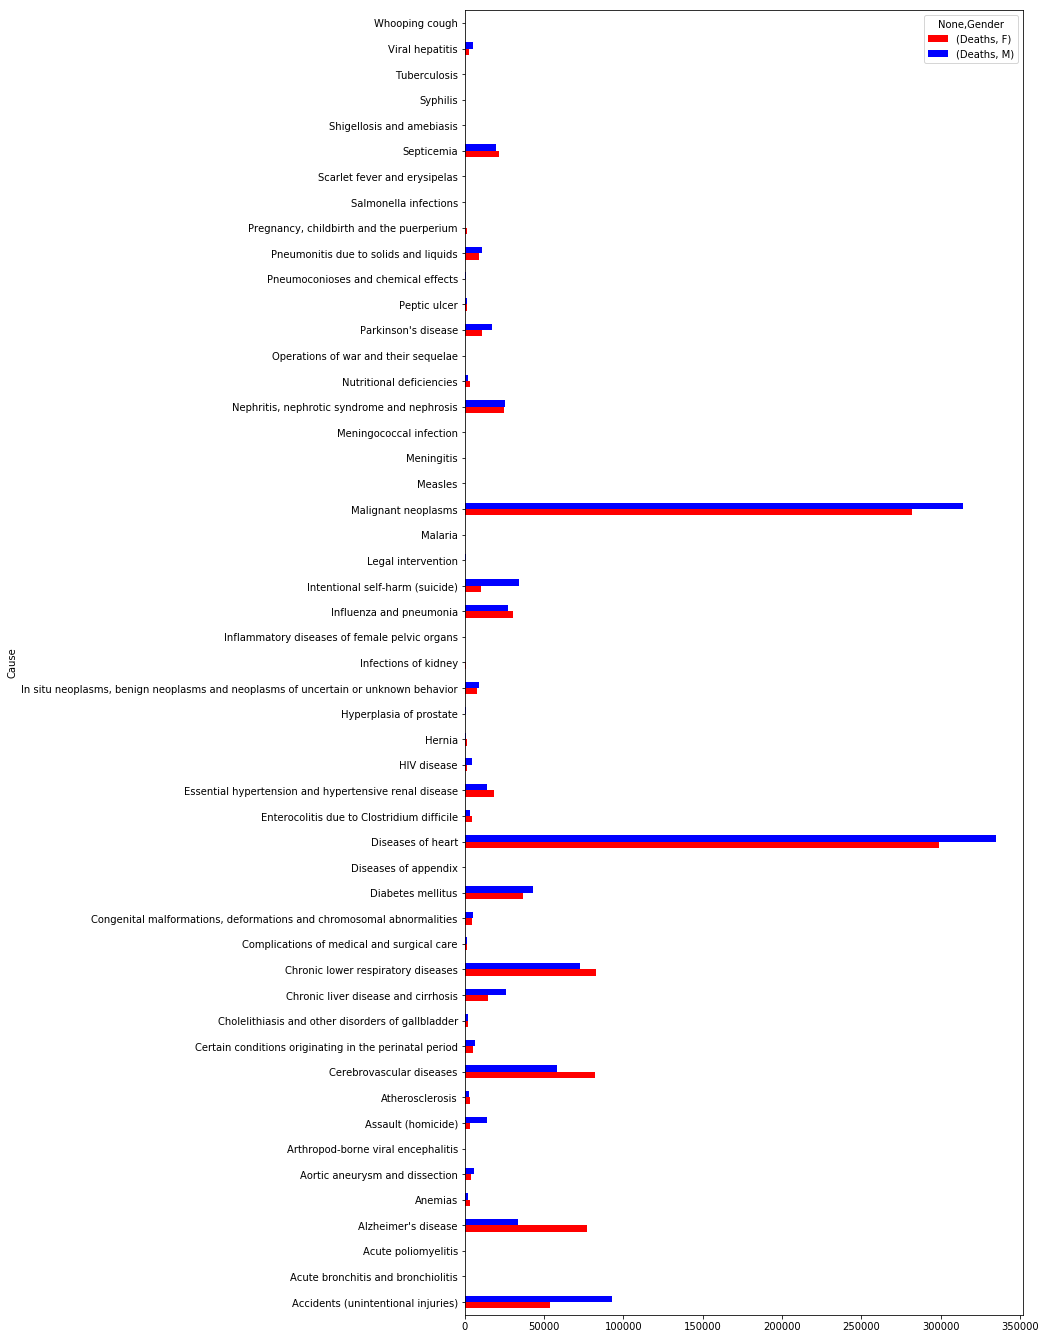

In [0]:
df2015\
.sort_values('Deaths', ascending = False)\
.groupby(["Cause","Gender"])\
.agg({'Deaths' : sum})\
.unstack(1)\
.plot(kind = "barh", color = ["red", "blue"], legend = True, figsize = [10,24])

<a id="causeXage"></a>
## Deaths: Causes of Death by Age // Причини смерті за віком

Because there are so many causes of death, let's choose just a few causes to visualize by age of death: // Оскільки є так багато причин смерті, давайте виберемо лише кілька причин для візуалізації за віком смерті:
- "Alzheimer's disease" // "Хвороба Альцгеймера"  
- "Diseases of heart" // "Захворювання серця"  
- "Malignant neoplasms" // "Злоякісні новоутворення"  --> (Рак)
- "Accidents (unintentional injuries)" // "Аварії (ненавмисні пошкодження)"

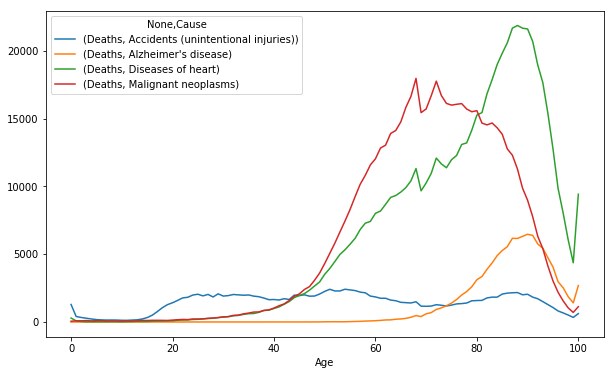

In [0]:
clist = ["Alzheimer's disease", 
         "Diseases of heart", 
         "Malignant neoplasms", 
         "Accidents (unintentional injuries)"]

## get dataframe where "Cause" is in "clist" 
## Отримати інформаційний кадр, де "Cuase" перебуває в "clist"
df2015_clist = df2015[df2015["Cause"].isin(clist)] 

df2015_clist\
.groupby(["Age","Cause"])\
.agg({'Deaths' : sum})\
.sort_values('Deaths', ascending = False)\
.unstack(1)\
.plot(kind = "line", legend = True, figsize = [10,6])

<font color="green"> Discuss: What do you notice from the graph above? // Обговорити: що ви помітили з наведеного вище графіка?</font>

<a id="causeXgenderXage"></a>
## Deaths: Causes of Death by Gender & Age // Причини смерті за віком та статтю

This visualization is particularly difficult because there are 2 genders x 3 years x 51 causes. It's virtually impossible to place all of this data on a single graph and make it easy to understand.

The best thing to do is to visualize some of the data, or just the data that is most interesting.

//

Ця візуалізація особливо важка, тому що є 2 стани x 3 роки x 51 причини. Це практично неможливо розмістити всі ці дані на одному графіку та полегшити його зрозуміти.
Найкраще робити це - це візуалізувати деякі дані або найцікавіші дані.

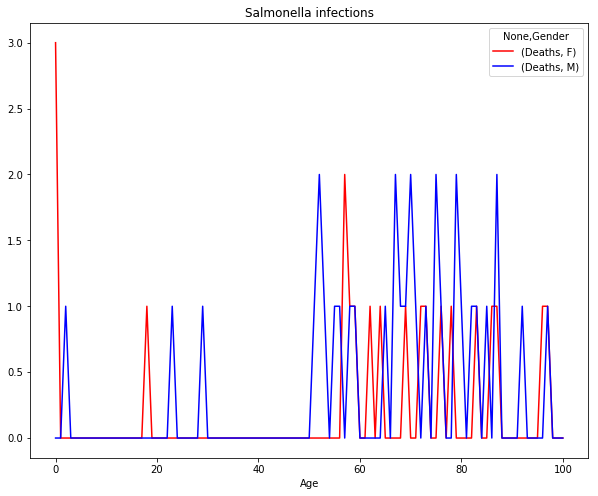

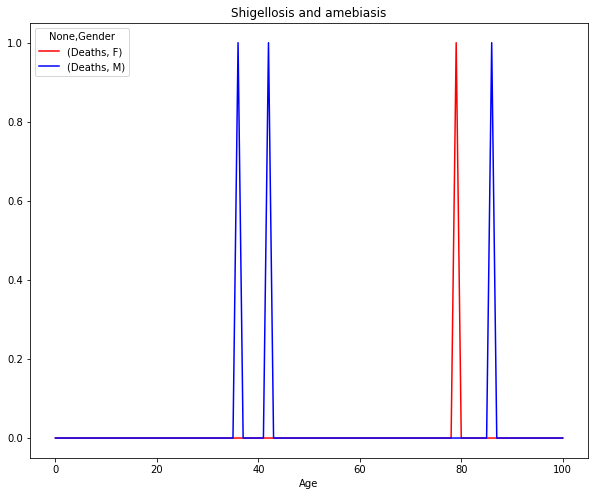

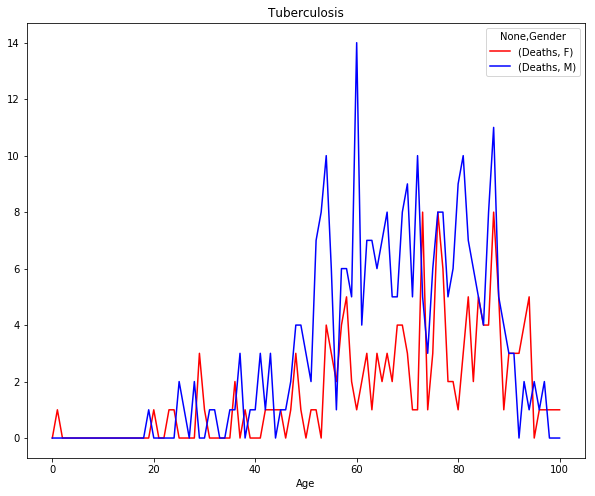

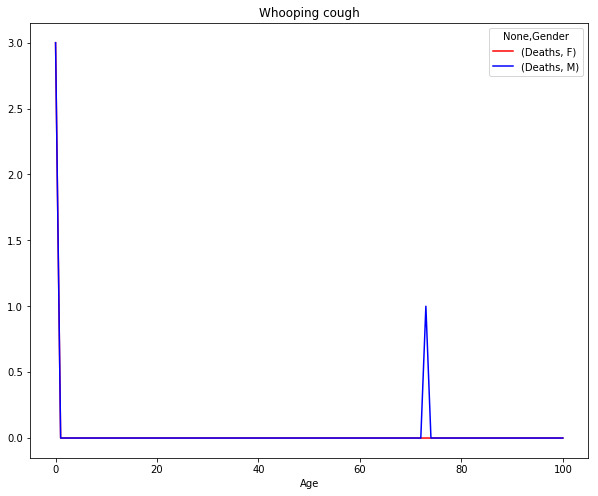

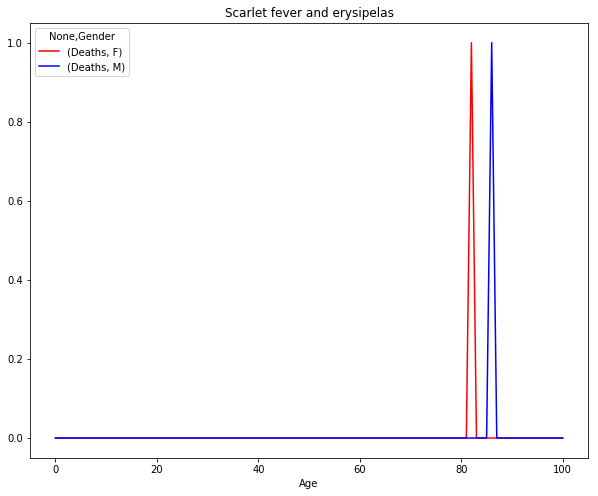

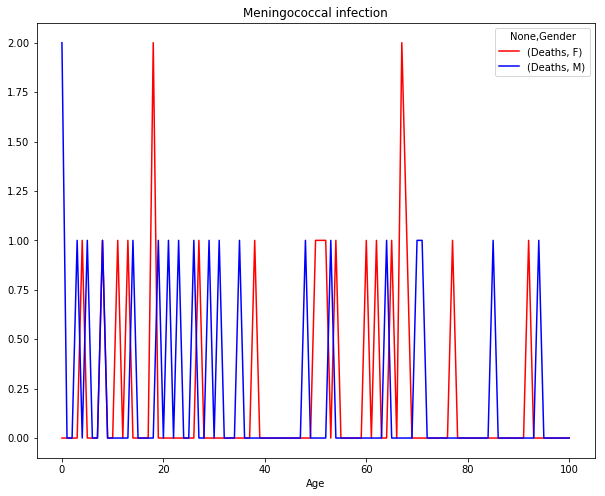

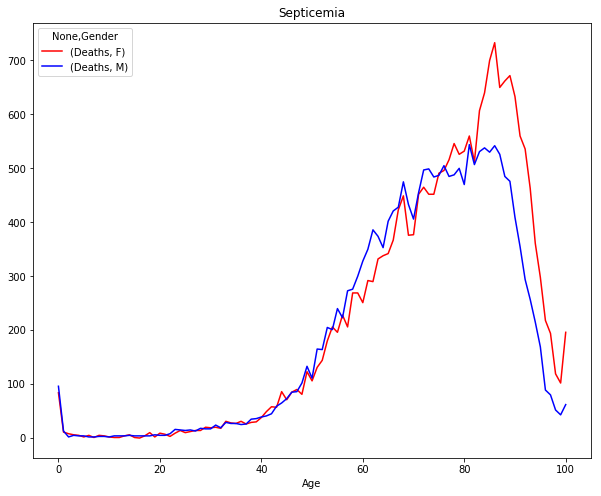

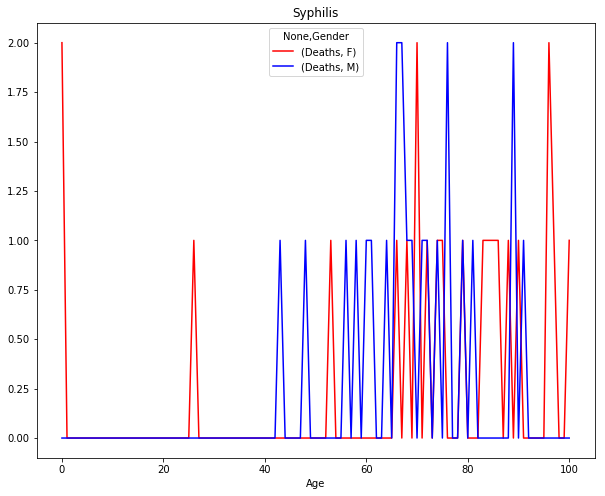

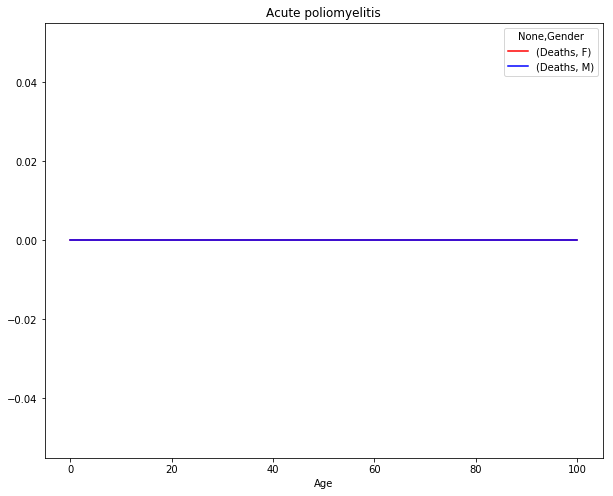

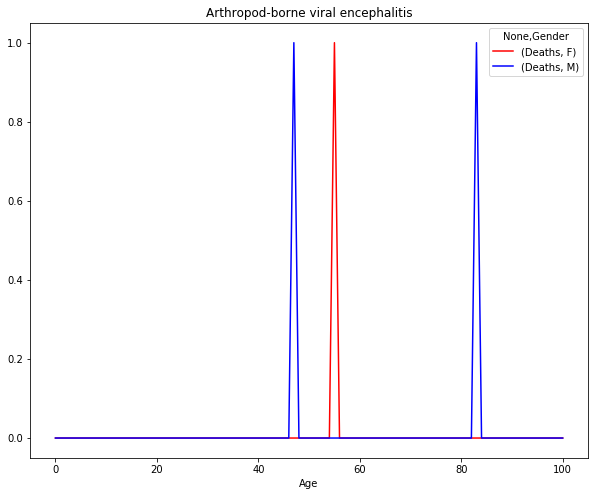

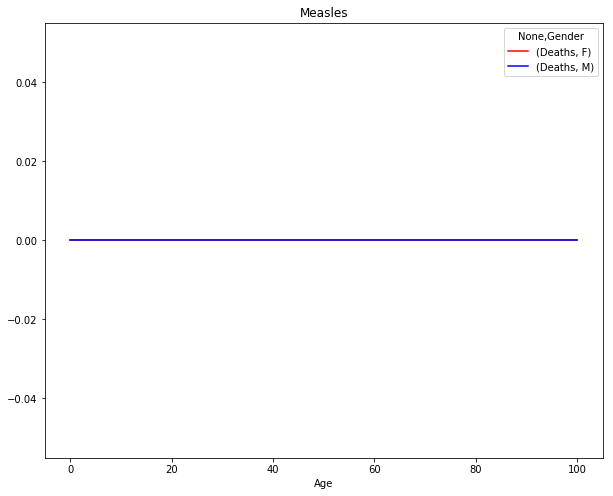

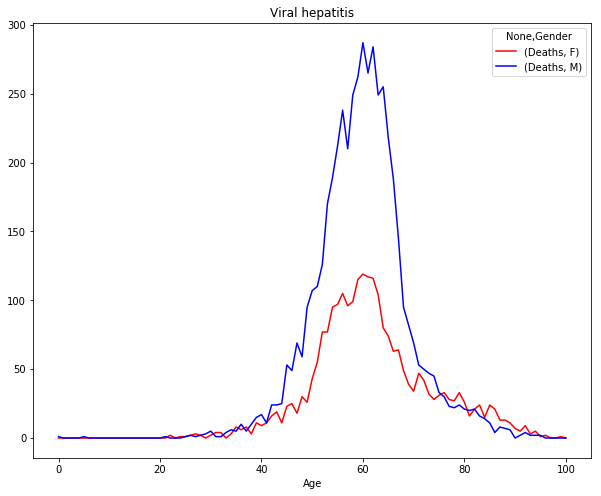

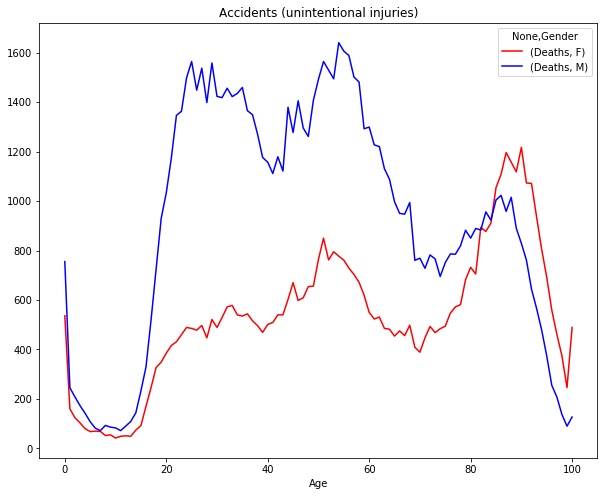

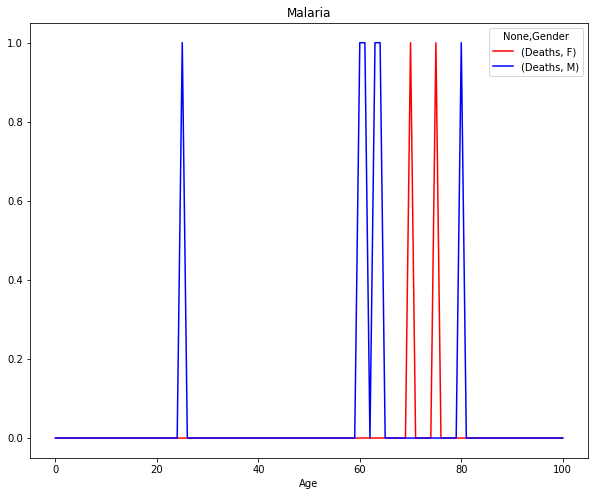

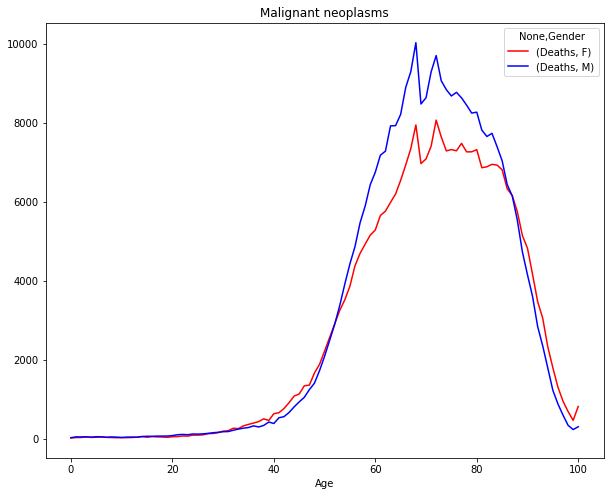

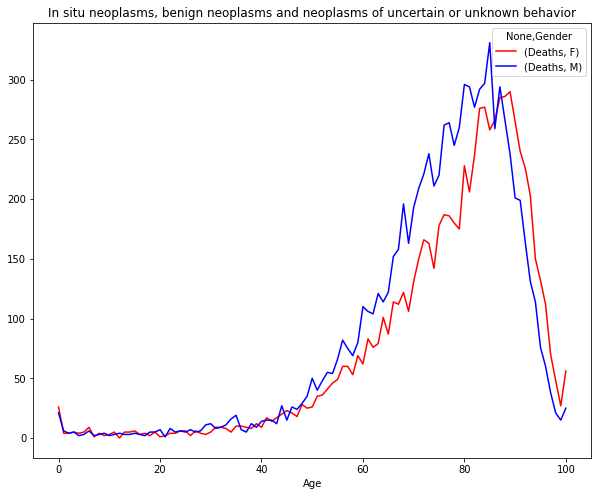

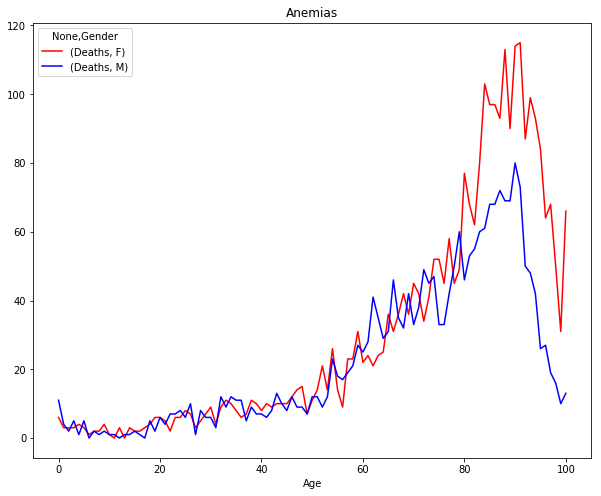

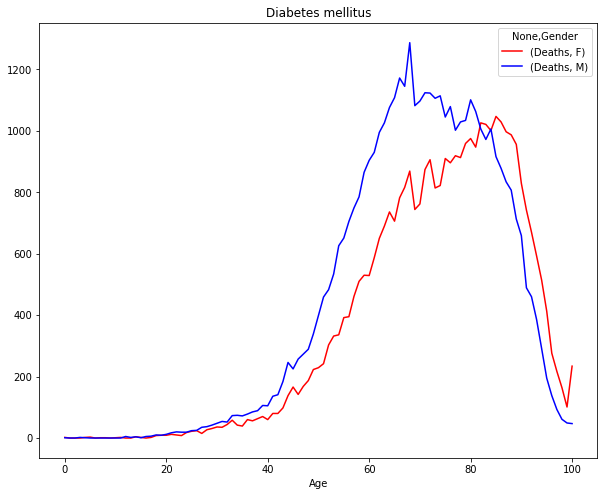

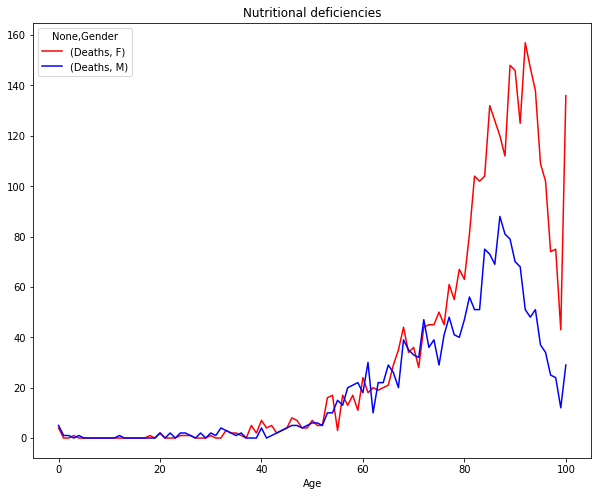

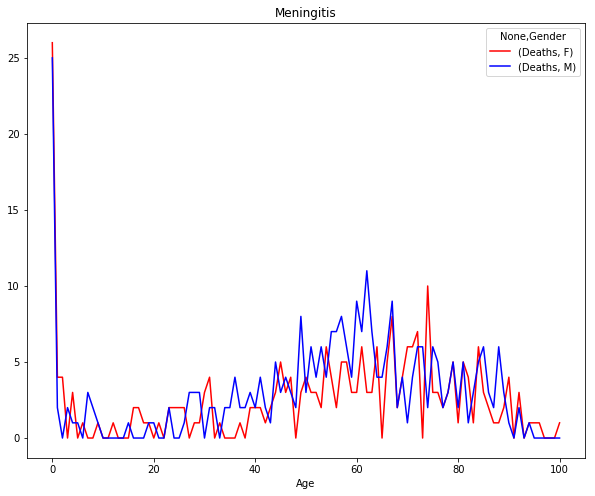

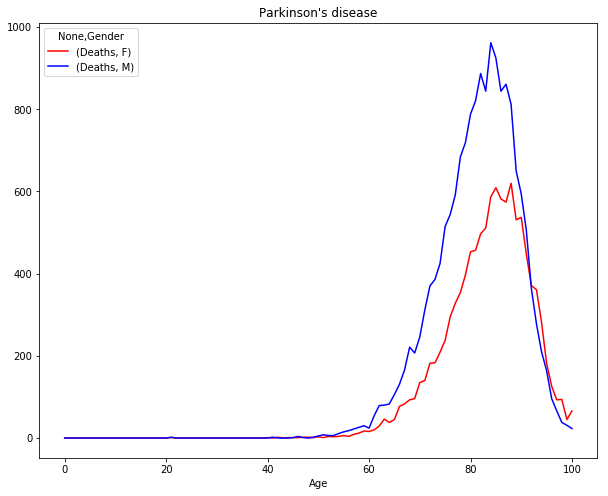

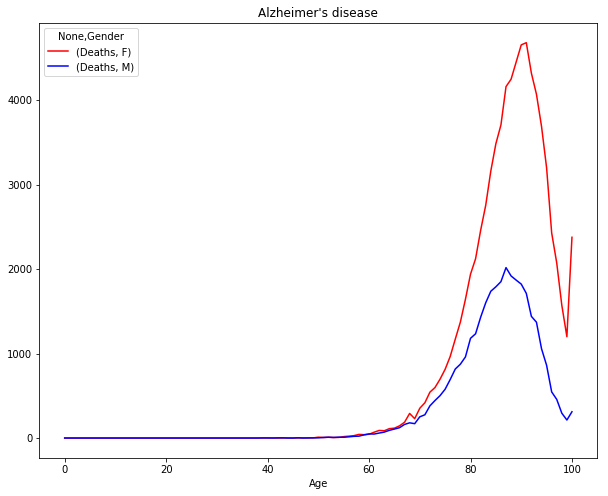

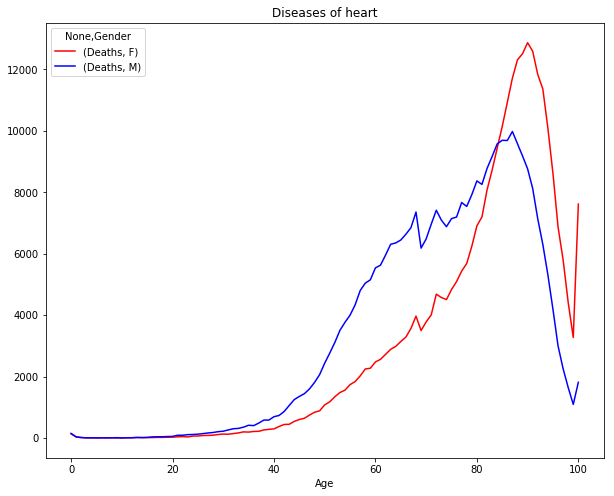

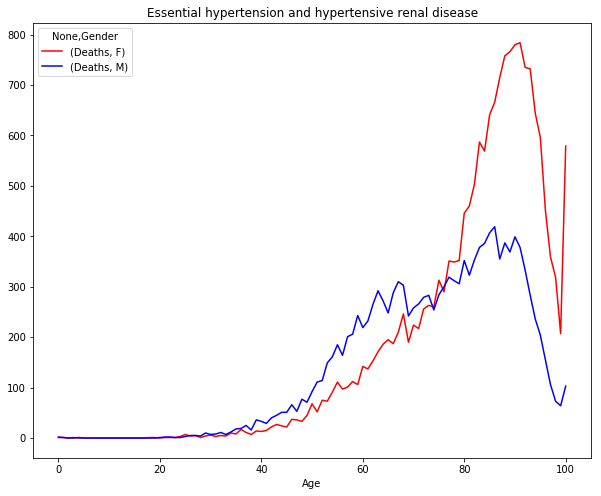

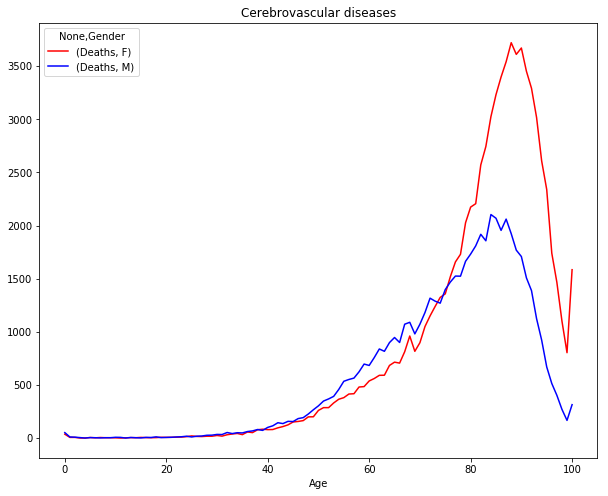

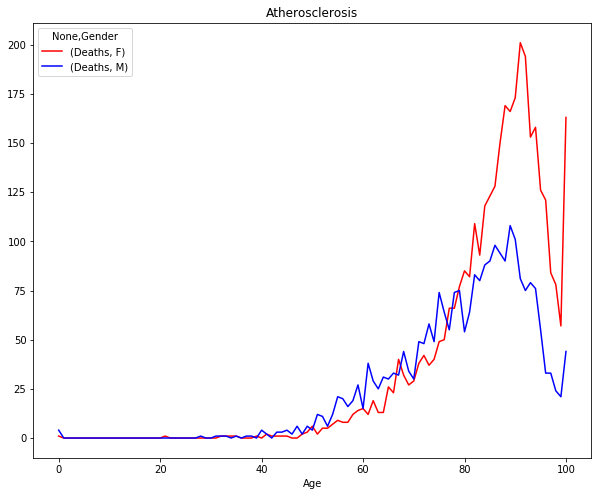

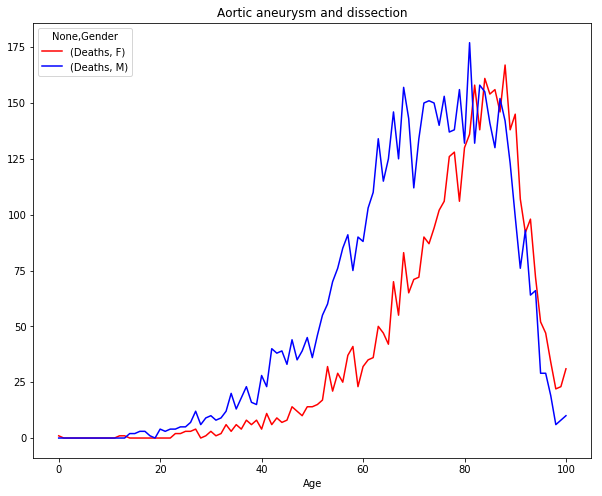

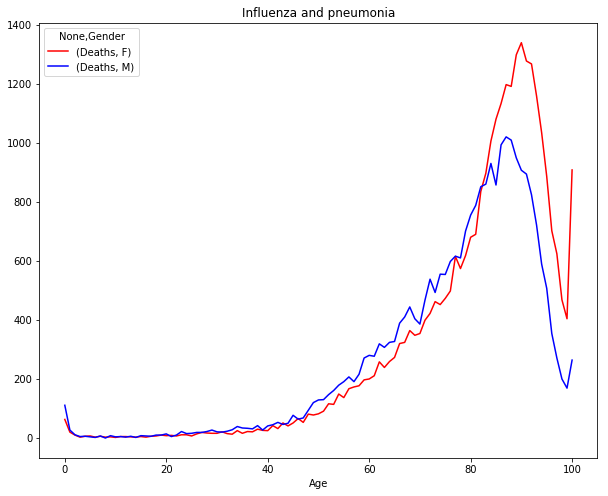

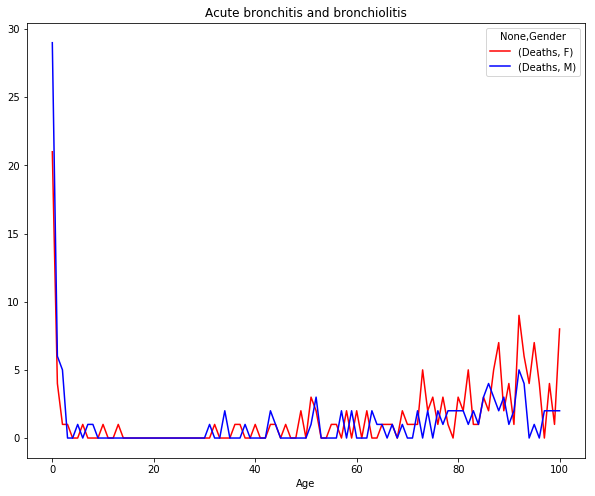

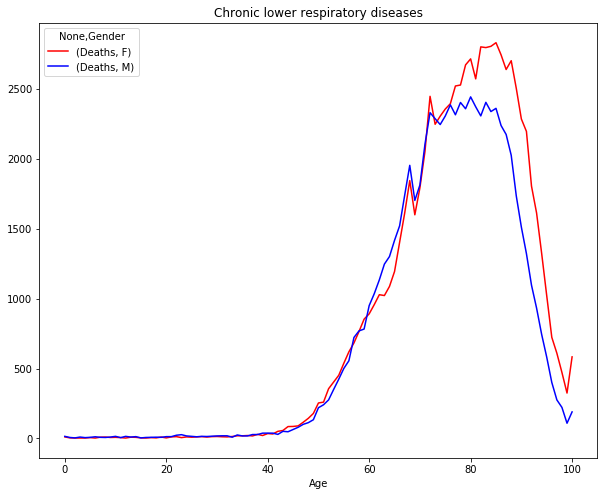

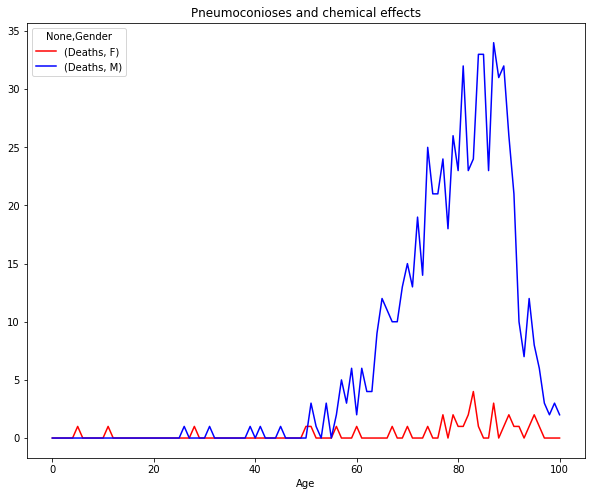

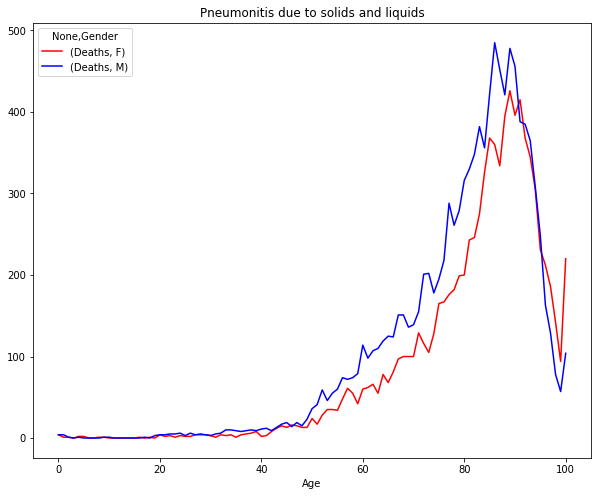

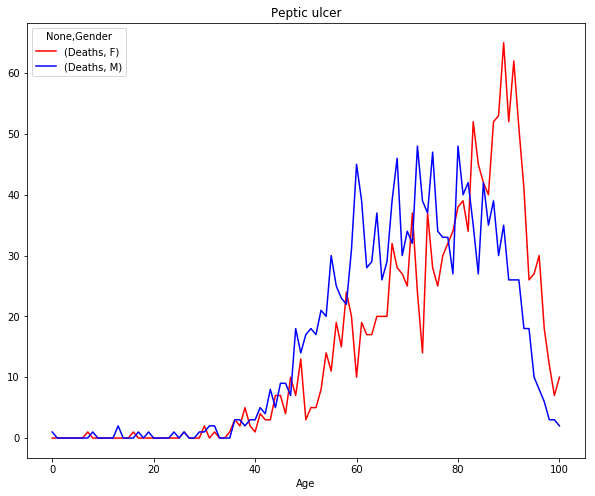

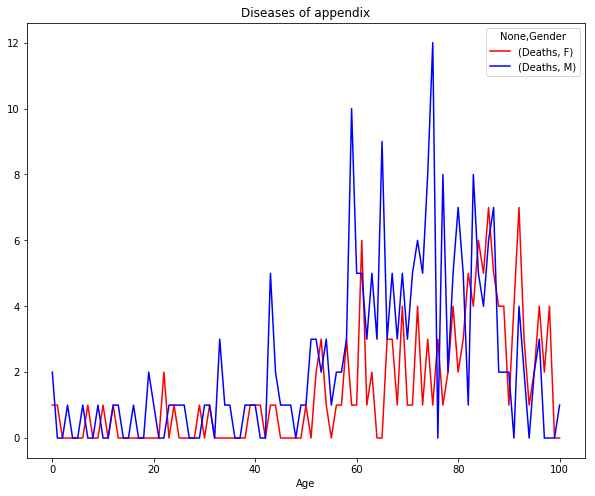

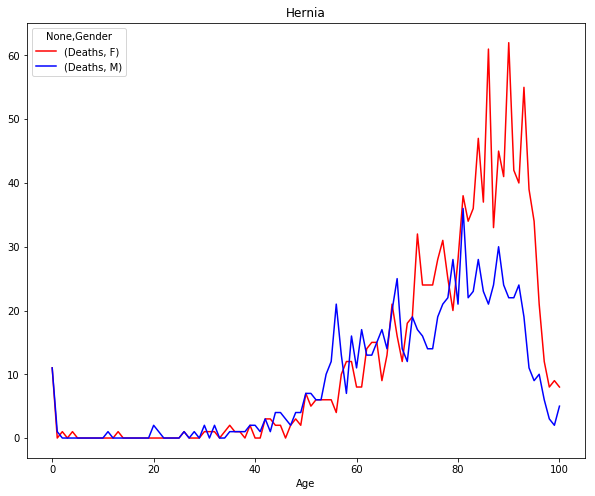

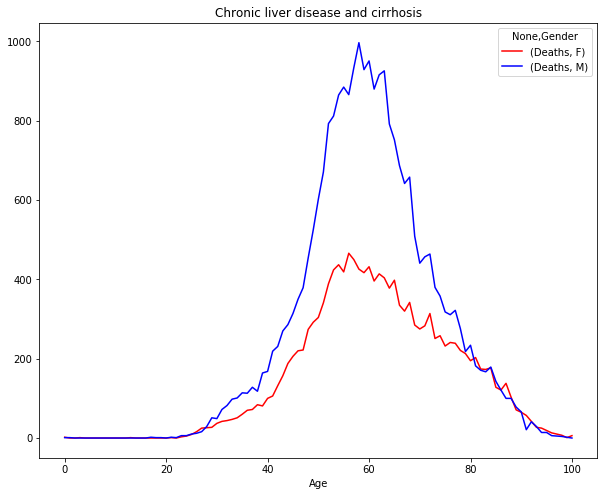

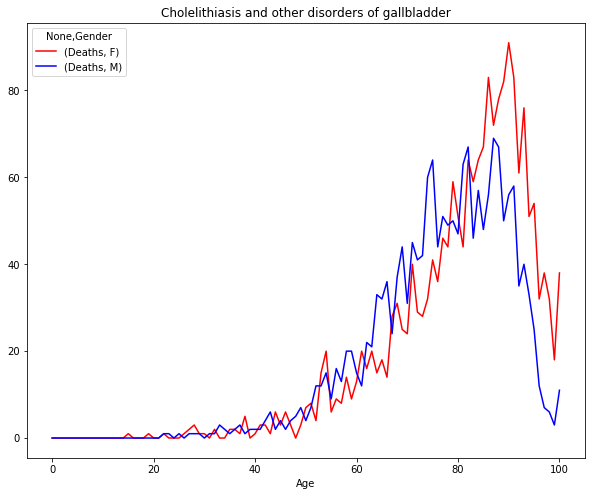

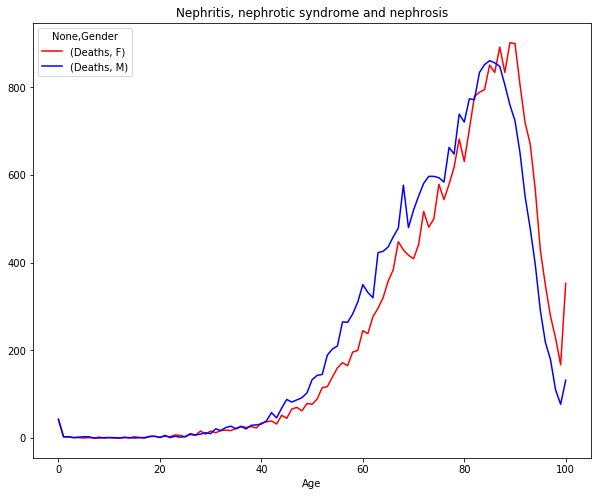

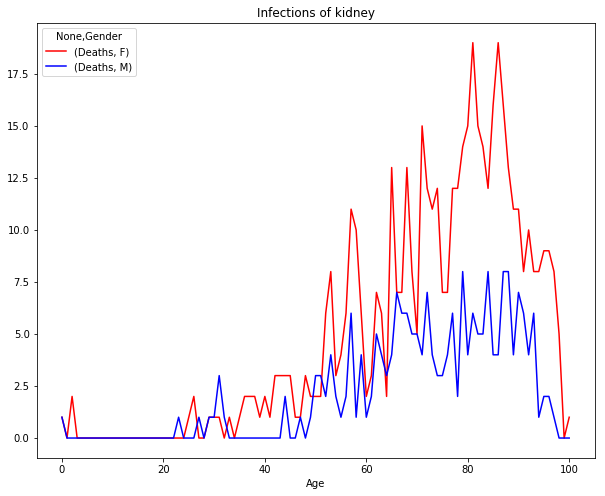

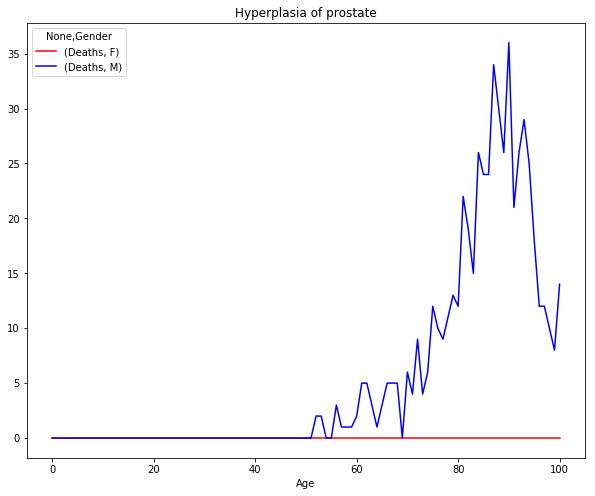

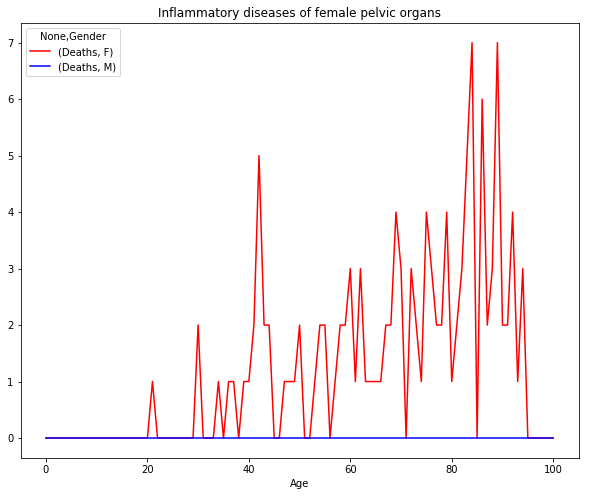

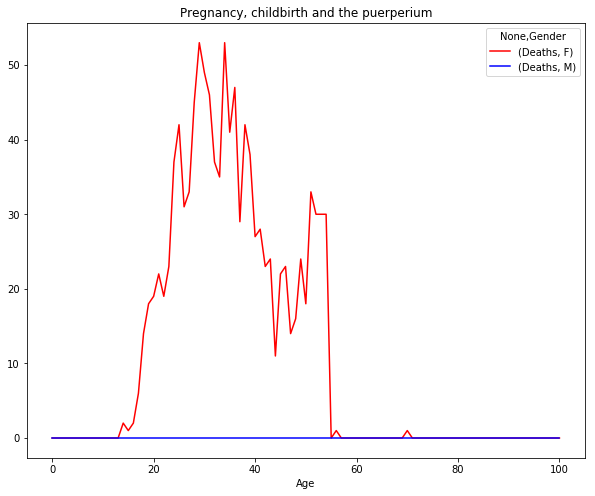

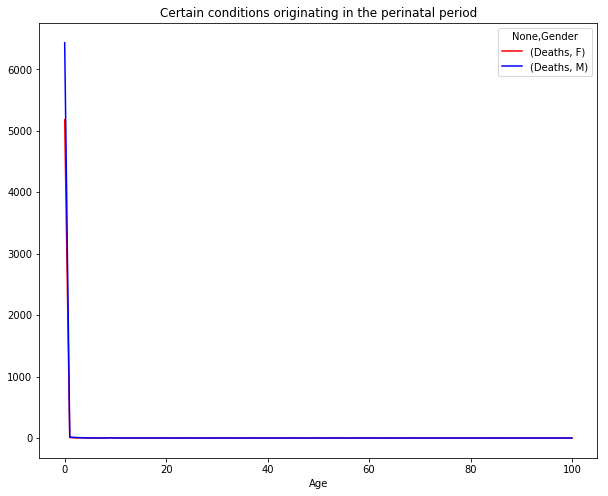

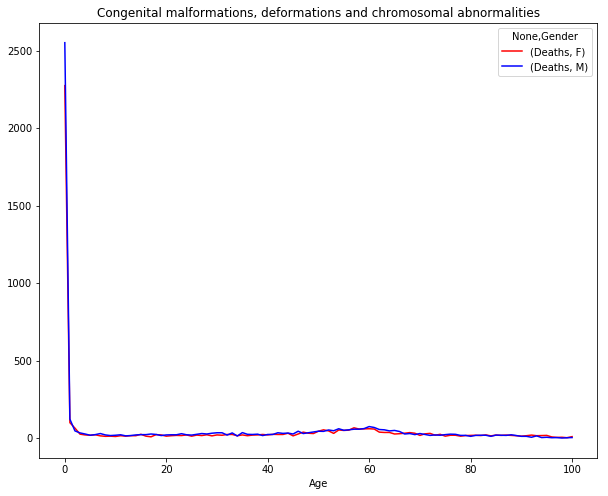

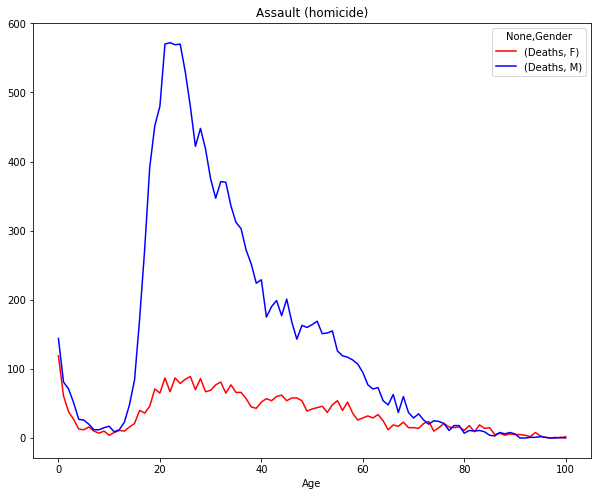

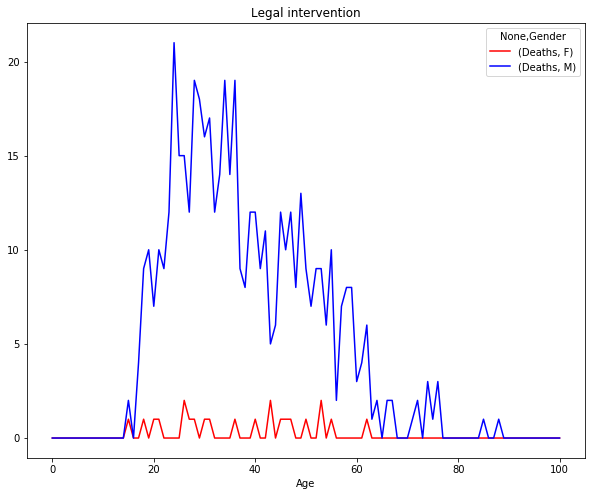

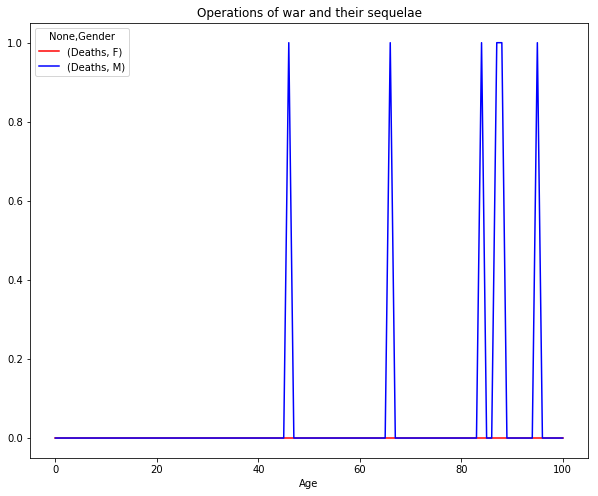

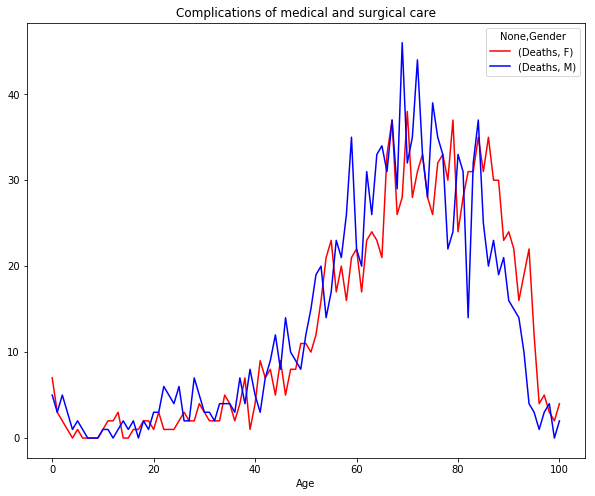

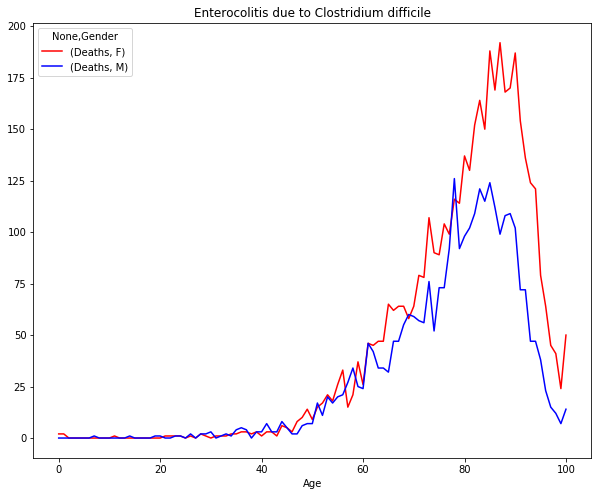

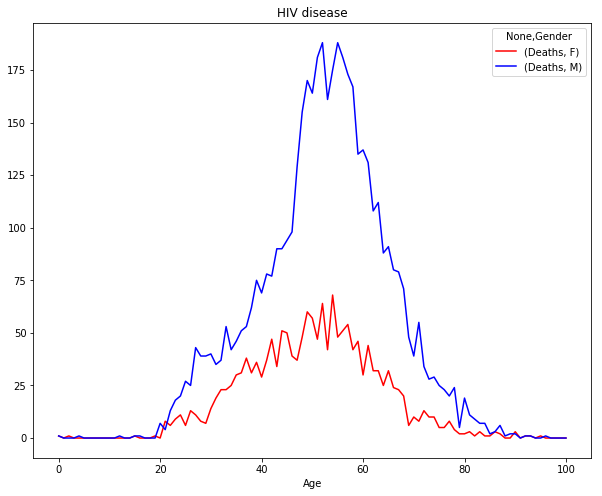

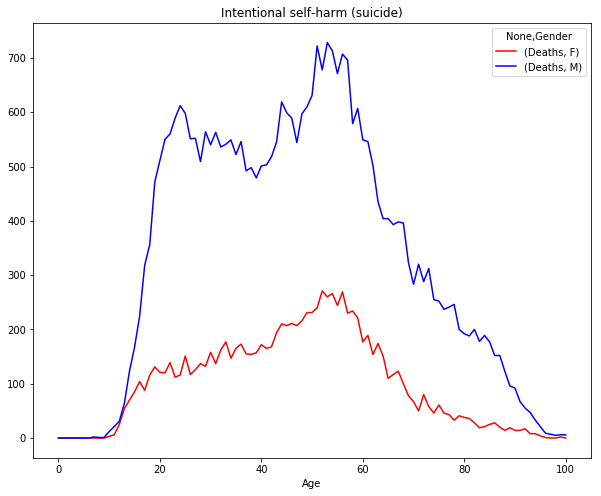

In [0]:
clist = df.Cause.unique()

for cause in clist:
    df2015_clist = df2015[df2015["Cause"].isin([cause])]
    
    df2015_clist\
    .groupby(["Age","Gender"])\
    .agg({'Deaths' : sum})\
    .unstack([1])\
    .plot(kind = "line", legend = True, color=('r','b'), figsize = [10,8], title = str(cause))

<hr>

## Want to learn more?

You can take free [Python 101](https://cocl.us/DX0108EN_PY0101EN) or [Data Analysis with Python](https://cocl.us/DX0108EN_DA0101EN) or [Data Visualization with Python](https://cocl.us/DX0108EN_DV0101EN) courses.  

Also, you can use Data Science Experience to run these notebooks faster with bigger datasets. Data Science Experience is IBM's leading cloud solution for data scientists, built by data scientists. With Jupyter notebooks, RStudio, Apache Spark and popular libraries pre-packaged in the cloud, DSX enables data scientists to collaborate on their projects without having to install anything. Join the fast-growing community of DSX users today with a free account at [Data Science Experience](https://cocl.us/DX0108EN_DSX). 

<hr>
Copyright &copy; 2017 [Cognitive Class](https://cognitiveclass.ai/?utm_source=cccopyrightlink&utm_medium=cclabs). This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license/).


<h3>Authors:</h3>
<article class="teacher">
<div class="teacher-image" style="    float: left;
    width: 115px;
    height: 115px;
    margin-right: 10px;
    margin-bottom: 10px;
    border: 1px solid #CCC;
    padding: 3px;
    border-radius: 3px;
    text-align: center;"><img class="alignnone wp-image-2258 " src="https://ibm.box.com/shared/static/tyd41rlrnmfrrk78jx521eb73fljwvv0.jpg" alt="Saeed Aghabozorgi" width="178" height="178" /></div>
<h4>Saeed Aghabozorgi</h4>
<p><a href="https://ca.linkedin.com/in/saeedaghabozorgi">Saeed Aghabozorgi</a>, PhD is a Data Scientist in IBM with a track record of developing enterprise level applications that substantially increases clients’ ability to turn data into actionable knowledge. He is a researcher in data mining field and expert in developing advanced analytic methods like machine learning and statistical modelling on large datasets.</p>
</article>
<br>
<article class="teacher">
<div class="teacher-image" style="    float: left;
    width: 115px;
    height: 115px;
    margin-right: 10px;
    margin-bottom: 10px;
    border: 1px solid #CCC;
    padding: 3px;
    border-radius: 3px;
    text-align: center;"><img class="alignnone size-medium wp-image-2177" src="https://ibm.box.com/shared/static/2ygdi03ahcr97df2ofrr6cf8knq4kodd.jpg" alt="Polong Lin" width="300" height="300" /></div>
<h4>Polong Lin</h4>
<p>
<a href="https://ca.linkedin.com/in/polonglin">Polong Lin</a> is a Data Scientist and Lead Data Science Advocate at IBM. Polong is a regular speaker in conferences and meetups where he teaches data science. Polong holds a M.Sc. in Cognitive Psychology.</p>
</article>